In [20]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [21]:
# Load the data
file_path = r"C:\Users\nahid\Desktop\Project USFS\Data\WASHINGTON_DC_2013_ndvi_metrics_cover.csv"
df = pd.read_csv(file_path)

# Select the dependent variable (NDVI)
y = df['NDVIMEAN']  

# Select the independent variables (land cover classifications)
X = df[['WATER', 'IMPERVIOUS', 'SOIL_BARREN', 'TREES_FOREST', 
        'GRASS_HERBACEOUS', 'AGRICULTURE', 'WOODY_WETLANDS', 
        'EMERGENT_WETLANDS']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [22]:
# Build the model
model = Sequential()

# Input layer
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


c:\Users\nahid\Desktop\Project USFS\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/100
120302/120302 ━━━━━━━━━━━━━━━━━━━━ 186s 2ms/step - loss: 0.0123 - mae: 0.0796 - val_loss: 0.0102 - val_mae: 0.0736
Epoch 2/100
120302/120302 ━━━━━━━━━━━━━━━━━━━━ 173s 1ms/step - loss: 0.0108 - mae: 0.0759 - val_loss: 0.0101 - val_mae: 0.0739
Epoch 3/100
120302/120302 ━━━━━━━━━━━━━━━━━━━━ 165s 1ms/step - loss: 0.0108 - mae: 0.0759 - val_loss: 0.0100 - val_mae: 0.0733
Epoch 4/100
120302/120302 ━━━━━━━━━━━━━━━━━━━━ 167s 1ms/step - loss: 0.0108 - mae: 0.0758 - val_loss: 0.0100 - val_mae: 0.0733
Epoch 5/100
120302/120302 ━━━━━━━━━━━━━━━━━━━━ 167s 1ms/step - loss: 0.0109 - mae: 0.0761 - val_loss: 0.0101 - val_mae: 0.0741
Epoch 6/100
120302/120302 ━━━━━━━━━━━━━━━━━━━━ 163s 1ms/step - loss: 0.0108 - mae: 0.0760 - val_loss: 0.0103 - val_mae: 0.0745
Epoch 7/100
120302/120302 ━━━━━━━━━━━━━━━━━━━━ 166s 1ms/step - loss: 0.0109 - mae: 0.0762 - val_loss: 0.0100 - val_mae: 0.0735
Epoch 8/100
120302/120302 ━━━━━━━━━━━━━━━━━━━━ 165s 1ms/step - loss: 0.0109 - mae: 0.0762 - val_loss: 0.0101 - 

In [24]:
# Evaluate the model on the test data
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)

# Predict on test data
y_pred = model.predict(X_test_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Test MAE: {test_mae}")
print(f"Test RMSE: {rmse}")


37595/37595 ━━━━━━━━━━━━━━━━━━━━ 27s 714us/step - loss: 0.0114 - mae: 0.0775
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 26s 684us/step
Test MAE: 0.07766600698232651
Test RMSE: 0.10692230929732592


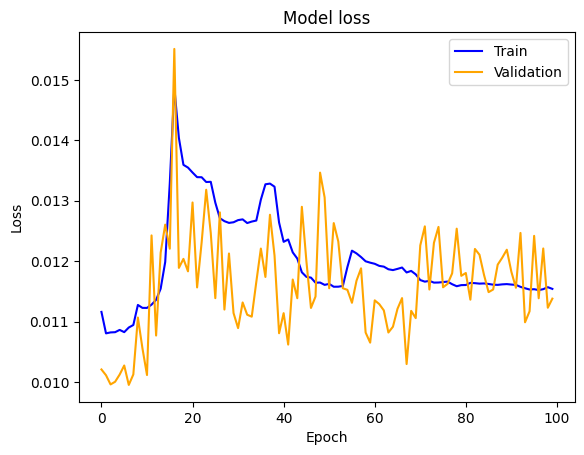

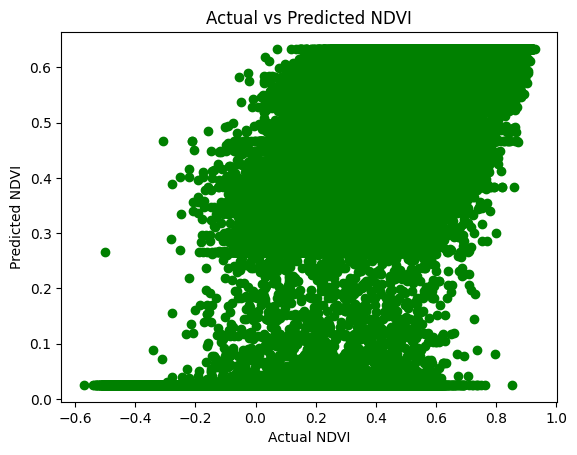

In [25]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='orange')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot predictions vs actual with different colors
plt.scatter(y_test, y_pred, c='green')  # Use green color for the scatter plot
plt.xlabel('Actual NDVI')
plt.ylabel('Predicted NDVI')
plt.title('Actual vs Predicted NDVI')
plt.show()



37595/37595 ━━━━━━━━━━━━━━━━━━━━ 27s 720us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 26s 686us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 26s 683us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 26s 680us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 24s 644us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 25s 663us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 25s 654us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 26s 678us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 26s 702us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 24s 643us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 25s 674us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 24s 647us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 25s 669us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 25s 667us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 25s 656us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 26s 686us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 26s 682us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 25s 651us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 25s 658us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 26s 692us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 26s 693

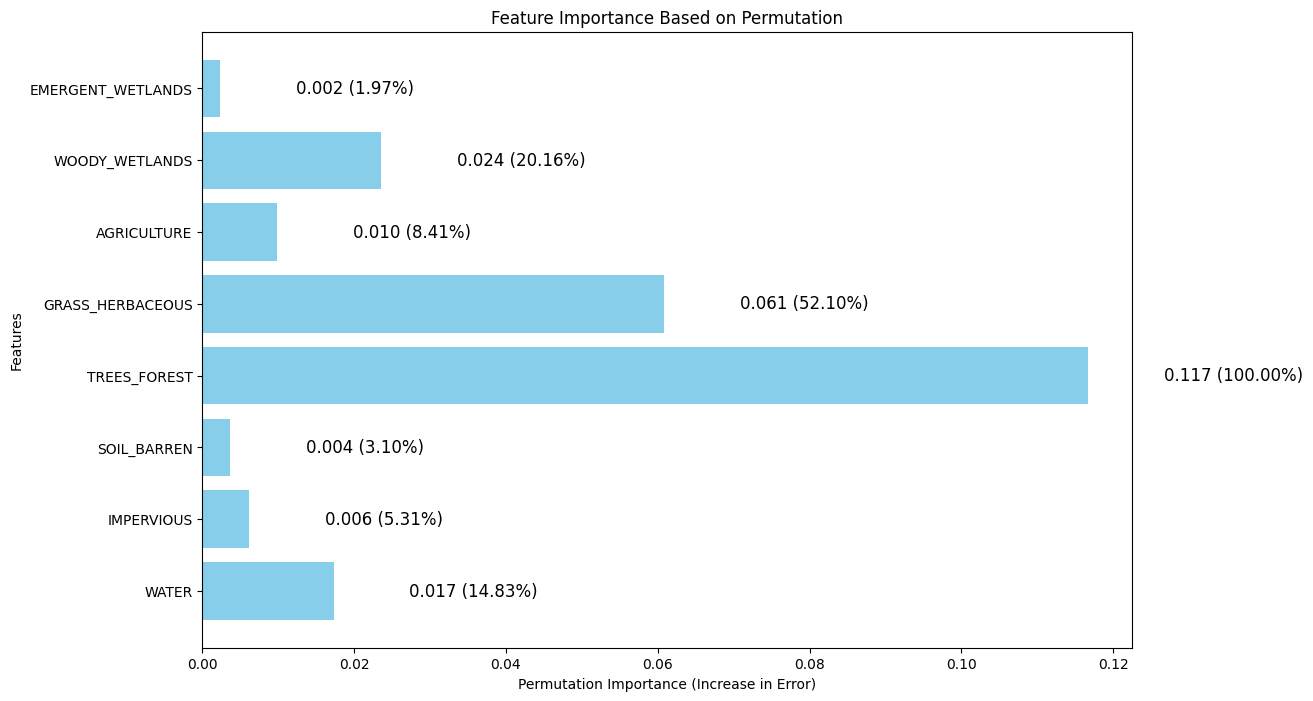

In [26]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Compute permutation importance
result = permutation_importance(model, X_test_scaled, y_test, n_repeats=10, random_state=42, scoring='neg_mean_squared_error')

# Get the importance of each feature
importance = result.importances_mean

# Normalize importance by the maximum value to show relative importance
relative_importance = importance / np.max(importance)

# Plot the feature importance
plt.figure(figsize=(12, 8))
bars = plt.barh(X.columns, importance, color='skyblue')

# Add exact values on the bars
for bar, val, rel_val in zip(bars, importance, relative_importance):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f'{val:.3f} ({rel_val:.2%})', 
             va='center', ha='left', color='black', fontsize=12)

plt.xlabel('Permutation Importance (Increase in Error)')
plt.ylabel('Features')
plt.title('Feature Importance Based on Permutation')
plt.show()

